<a href="https://colab.research.google.com/github/Meenakshipooranik/Formula1-Mini-Sprint/blob/main/formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FORMULA 1 DRIVERS PERFORMANCE:**


##*Scenario:*

To analyze Formula 1 drivers’ performance metrics The goal is to uncover patterns and predictive factors that influence race outcomes and driver performance,capturing detailed performance statistics for each driver.

##*Hypothesis:*

By analyzing the historical performance data of Formula 1 teams, we can identify key factors that contribute to good performance, including grid position, race time in milliseconds, number of laps completed, final position order, and pitstop time.

##*Initial Data Exploration:*

- Heatmap to show correlation

- Top 10 Drivers, Constructors

- Aggregating pit stop times

##*Machine Learning:*
-Linear Regression

-Random Forest






###circuits.csv

column name  | definition
-------------------|------------------
**circuitId**      | (key)Id
**cicruitRef**     | Reference name of circuit
   **name**        | Actual name of circuit
 **location**      | City
**country**        | Country
**lat**            | Latitude
**lng**            | Longitude
**alt**            | Altitude
**url**            | Wikipedia URL

A circuit refers to the track or racing venue where Formula 1 races take place.

###constructors.csv

column name  | definition
-------------------|------------------
**constructorId**      | (key)Id
**constructorRef**     | Reference name of constructor
   **name**        | Actual name of constructor
 **nationality**      | Country
**url**        | Wikipedia URL

A constructor refers to a team that is responsible for the overall design and development of their Formula 1 car. Formula 1 has seen a stable number of teams participating in each season, typically ranging from 10 to 12 constructors.

###constructors_standings.csv

column name  | definition
-------------------|------------------
**constructorStandingsId**  | (key)Id
**raceId**    | Id of race
   **constructorId**        | Id of constructor
 **points**      | Points scored
**positions**        | Final position
**positionText** | Final position in text
**wins** | Number of wins

The constructor standings are determined by adding up the total points earned by each team throughout the season. The team with the highest cumulative points at the end of the season is declared the Constructors' Champion.

###constructors_results.csv

column name  | definition
-------------------|------------------
**constructorResultsId**  | (key)Id
**raceId**    | Id of race
**constructorId**        | Id of constructor
 **points**      | Points scored
**status**        | Status of results


###drivers.csv

column name  | definition
-------------------|------------------
**driverId**  | (key)Id
**driverRed**    | Reference name of driver
**number**        | Driver number
 **code**      | 3-letter alphabet code of driver
**forename**        | First name
**surname** | Last name
**dob** | Date of birth
**nationality** | Country
**url** | Wikipedia URL

In a Formula 1 season, there are typically 20 drivers representing 10 teams (constructors) on the grid.

###drivers_standings.csv

column name  | definition
-------------------|------------------
**driverStandingsId**  | (key)Id
**raceId**    | Id of race
**driverId**        | Id of driver
 **points**      | Points
**position**        | Final position
**positionText** | Final position in text
**wins** | Number of wins

Throughout the season drivers accumulate points from each race they compete in. Only drivers in finishing positions 1-10 earn points for a race



###lap_times.csv

column name  | definition
-------------------|------------------
**raceId**    | Id of race
**driverId**        | Id of driver
 **lap**      | Lap number
**position**        | Final position
**time** | Time
**milliseconds** | Time in milliseconds

###pit_stops.csv

column name  | definition
-------------------|------------------
**raceId**    | Id of race
**driverId**        | Id of driver
 **stop**      | Stop number
**lap**        | Lap number
**time** | Time of pit stop
**duration** | Duration of pit stop
**milliseconds** | Time in milliseconds

###qualifying.csv

column name  | definition
-------------------|------------------
**qualifyId** | Id
**raceId**    | Id of race
**driverId**        | Id of driver
 **constructorId**      | Stop number
**number**        | Car number
**postion** | Final position
**q1** | Time in Qualifying Round 1
**q2** | Time in Qualifying Round 2
**q3** | Time in Qualifying Round 3

In Formula 1, qualifying refers to the process by which drivers compete to determine the starting grid positions for the race. Qualifying sessions typically take place on the day before the race, usually on Saturday. Q1 all drivers participate, Q2 the remaining drivers participate, Q3 top ten drivers compete for best grid position.

###races.csv

column name  | definition
-------------------|------------------
**raceId**    | Id of race
**year**        | Id of driver
 **round**      | Race number
**circuitId**        | Id of circuit
**name** | Name of circuit
**date** | Date
**time** | Time
**url** | Wikipedia URL
**fp1_date** | Free Practice 1, session takes place on Friday during a race weekend
**fp1_time** | Free Practice 1, time

The typical number of races in a Formula 1 season has been around 20 to 23 races.The number of races in a Formula 1 season can vary from one year to the next.

###results.csv

column name  | definition
-------------------|------------------
**results** | Id of results
**raceId**    | Id of race
**driverId**        | Id of driver
 **constructorId**      | Stop number
**number**        | Car number
**grid** | Starting position at the beginning of the race
**postion** | Final position
**positionText** | Final position in text
**positionOrder** | Final rank
**points** | Points
**laps** | Lap number
**time** | Time
**milliseconds** | Time in milliseconds
**fastestLap** | Fastest Lap
**rank** | Standing Rank
**fastestLapTime** | Fastest Lap Time
**fastestLapSpeed** | Fastest Lap Speed
**statusId** | Status

###seasons.csv

column name  | definition
-------------------|------------------
**year**    | Year
**url**        | Wikipedia URL

###sprint_results.csv

column name  | definition
-------------------|------------------
**results** | Id of results
**raceId**    | Id of race
**driverId**        | Id of driver
 **constructorId**      | Stop number
**number**        | Car number
**grid** | Starting position at the beginning of the race
**postion** | Final position
**positionText** | Final position in text
**positionOrder** | Final rank
**points** | Points
**laps** | Lap number
**time** | Time
**milliseconds** | Time in milliseconds
**fastestLap** | Fastest Lap
**rank** | Standing Rank
**fastestLapTime** | Fastest Lap Time
**fastestLapSpeed** | Fastest Lap Speed
**statusId** | Status

###status.csv

column name  | definition
-------------------|------------------
**statusId**    | Id
**status**      | Commentary notes on actions that occurred during race

# **Import libraries**

In [ ]:
pip install fastf1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import fastf1 as ff1
%matplotlib inline
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
plt.style.use('seaborn')

<ipython-input-1-802d1f1ebe5a>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Read in Data

In [2]:
driver_standings = pd.read_csv('/content/formula1-mini-sprint/driver_standings.csv')
drivers = pd.read_csv('/content/formula1-mini-sprint/drivers.csv')
results = pd.read_csv('/content/formula1-mini-sprint/results.csv')
constructors = pd.read_csv('/content/formula1-mini-sprint/constructors.csv')
constructor_results = pd.read_csv('/content/formula1-mini-sprint/constructor_results.csv')
constructor_standings = pd.read_csv('/content/formula1-mini-sprint/constructor_standings.csv')
races = pd.read_csv('/content/formula1-mini-sprint/races.csv')
pit_stops = pd.read_csv('/content/formula1-mini-sprint/pit_stops.csv')
qualifying = pd.read_csv('/content/formula1-mini-sprint/qualifying.csv')


In [4]:
driver_standings.info()
driver_standings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
5,6,18,6,3.0,6,6,0
6,7,18,7,2.0,7,7,0
7,8,18,8,1.0,8,8,0
8,9,19,1,14.0,1,1,1
9,10,19,2,11.0,3,3,0


In [5]:
driver_standings.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


In [6]:

drivers.info()
drivers.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


In [7]:

results.info()
results.head(10).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

,0,1,2,3,4,5,6,7,8,9
resultId,1,2,3,4,5,6,7,8,9,10
raceId,18,18,18,18,18,18,18,18,18,18
driverId,1,2,3,4,5,6,7,8,9,10
constructorId,1,2,3,4,1,3,5,6,2,7
number,22,3,7,5,23,8,14,1,4,12
grid,1,5,7,11,3,13,17,15,2,18
position,1,2,3,4,5,6,7,8,\N,\N
positionText,1,2,3,4,5,6,7,8,R,R
positionOrder,1,2,3,4,5,6,7,8,9,10
points,10.0,8.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,0.0


In [ ]:

constructors.info()
constructors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [ ]:

races.info()
races.head(10).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


,0,1,2,3,4,5,6,7,8,9
raceId,1,2,3,4,5,6,7,8,9,10
year,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009
round,1,2,3,4,5,6,7,8,9,10
circuitId,1,2,17,3,4,6,5,9,20,11
name,Australian Grand Prix,Malaysian Grand Prix,Chinese Grand Prix,Bahrain Grand Prix,Spanish Grand Prix,Monaco Grand Prix,Turkish Grand Prix,British Grand Prix,German Grand Prix,Hungarian Grand Prix
date,2009-03-29,2009-04-05,2009-04-19,2009-04-26,2009-05-10,2009-05-24,2009-06-07,2009-06-21,2009-07-12,2009-07-26
time,06:00:00,09:00:00,07:00:00,12:00:00,12:00:00,12:00:00,12:00:00,12:00:00,12:00:00,12:00:00
url,http://en.wikipedia.org/wiki/2009_Australian_G...,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,http://en.wikipedia.org/wiki/2009_Turkish_Gran...,http://en.wikipedia.org/wiki/2009_British_Gran...,http://en.wikipedia.org/wiki/2009_German_Grand...,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...
fp1_date,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
fp1_time,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
pit_stops.info()
pit_stops.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:

qualifying.info()
qualifying.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


# Clean Data

Identify null values, unique values, duplicates, any outliers

In [3]:
print("Null Values", "\n")
print("driver_standings", "\n")
driver_standings.isnull().sum()


Null Values 

driver_standings 



driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [4]:
print("Null Values", "\n")
print("drivers", "\n")
drivers.isnull().sum()

Null Values 

drivers 



driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [5]:
drivers.nunique()

driverId       857
driverRef      857
number          45
code            95
forename       476
surname        798
dob            839
nationality     42
url            857
dtype: int64

In [6]:
print("Null Values", "\n")
print("Results", "\n")
results.isnull().sum()


Null Values 

Results 



resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [7]:

print("Null Values", "\n")
print("Constructor_results", "\n")
constructor_results.isnull().sum()

Null Values 

Constructor_results 



constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

In [8]:

print("Null Values", "\n")
print("Constructor_standings", "\n")
constructor_standings.isnull().sum()

Null Values 

Constructor_standings 



constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

In [9]:
print("Null Values", "\n")
print("races", "\n")
races.isnull().sum()

Null Values 

races 



raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

In [10]:

for column in results.columns:
    # Count duplicates for the current column
    duplicate_count = results[column].duplicated().sum()
    print(f"Number of duplicates in '{column}': {duplicate_count}")

Number of duplicates in 'resultId': 0
Number of duplicates in 'raceId': 24989
Number of duplicates in 'driverId': 25223
Number of duplicates in 'constructorId': 25870
Number of duplicates in 'number': 25950
Number of duplicates in 'grid': 26045
Number of duplicates in 'position': 26046
Number of duplicates in 'positionText': 26041
Number of duplicates in 'positionOrder': 26041
Number of duplicates in 'points': 26041
Number of duplicates in 'laps': 25908
Number of duplicates in 'time': 19080
Number of duplicates in 'milliseconds': 18867
Number of duplicates in 'fastestLap': 26000
Number of duplicates in 'rank': 26054
Number of duplicates in 'fastestLapTime': 19110
Number of duplicates in 'fastestLapSpeed': 18935
Number of duplicates in 'statusId': 25943


In [11]:

print("Null Values", "\n")
print("pit_stops", "\n")
pit_stops.isnull().sum()

Null Values 

pit_stops 



raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64

In [16]:
pit_stops.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,10089.0,962.774011,81.144375,841.0,888.0,958.0,1035.0,1110.0
driverId,10089.0,523.998910,389.698555,1.0,18.0,815.0,831.0,858.0
stop,10089.0,1.759738,0.916282,1.0,1.0,2.0,2.0,6.0
lap,10089.0,25.312023,14.729775,1.0,13.0,25.0,36.0,78.0
milliseconds,10089.0,75348.633363,278858.845817,12897.0,21914.0,23570.0,26202.0,3069017.0


In [12]:
print("Null Values", "\n")
print("qualifying", "\n")
qualifying.isnull().sum()

Null Values 

qualifying 



qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               164
q3               327
dtype: int64

# Exploratory Data Analysis

In [13]:

merge_perf = results.merge(drivers, on='driverId')
merge_perf.head().T

,0,1,2,3,4
resultId,1,27,57,69,90
raceId,18,19,20,21,22
driverId,1,1,1,1,1
constructorId,1,1,1,1,1
number_x,22,22,22,22,22
grid,1,9,3,5,3
position,1,5,13,3,2
positionText,1,5,13,3,2
positionOrder,1,5,13,3,2
points,10.0,4.0,0.0,6.0,8.0


Text(0, 0.5, 'Points')

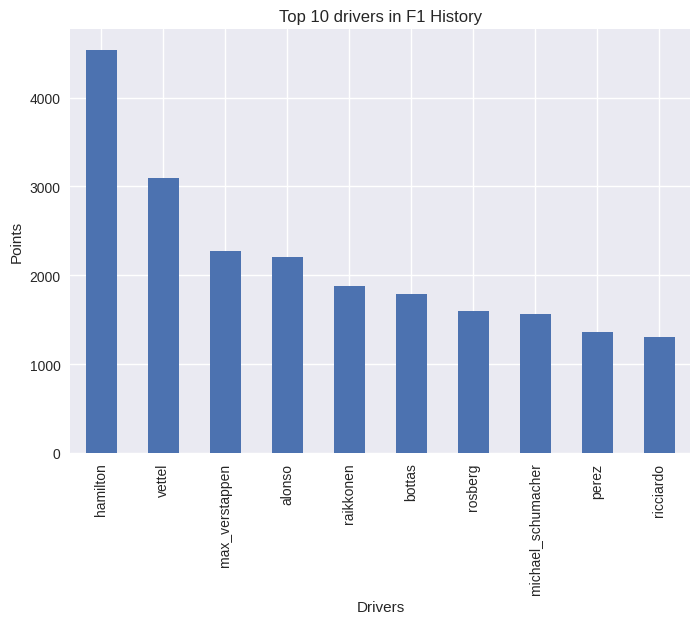

In [14]:
merge_perf.groupby('driverRef')['points'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 drivers in F1 History')
plt.xlabel('Drivers')
plt.ylabel('Points')

In [15]:

print("Top ten drivers career points")
merge_perf.groupby('driverRef')['points'].sum().sort_values(ascending=False).head(10)

Top ten drivers career points


driverRef
hamilton              4540.5
vettel                3098.0
max_verstappen        2275.5
alonso                2203.0
raikkonen             1873.0
bottas                1783.0
rosberg               1594.5
michael_schumacher    1566.0
perez                 1361.0
ricciardo             1307.0
Name: points, dtype: float64

In [16]:
constructor_perf = results.merge(constructors, on='constructorId')
constructor_perf.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,25,19,5,1,23,8,3,3,3,6.0,...,5517005,19,7,1:35.922,208.031,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,27,19,1,1,22,9,5,5,5,4.0,...,5525103,53,3,1:35.462,209.033,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,49,20,5,1,23,5,5,5,5,4.0,...,5493759,49,1,1:33.193,209.062,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


Top ten constructors


constructorRef
ferrari        10298.27
mercedes        7159.64
red_bull        6812.00
mclaren         6240.50
williams        3609.00
renault         1777.00
force_india     1098.00
team_lotus       995.00
benetton         861.50
tyrrell          711.00
Name: points, dtype: float64

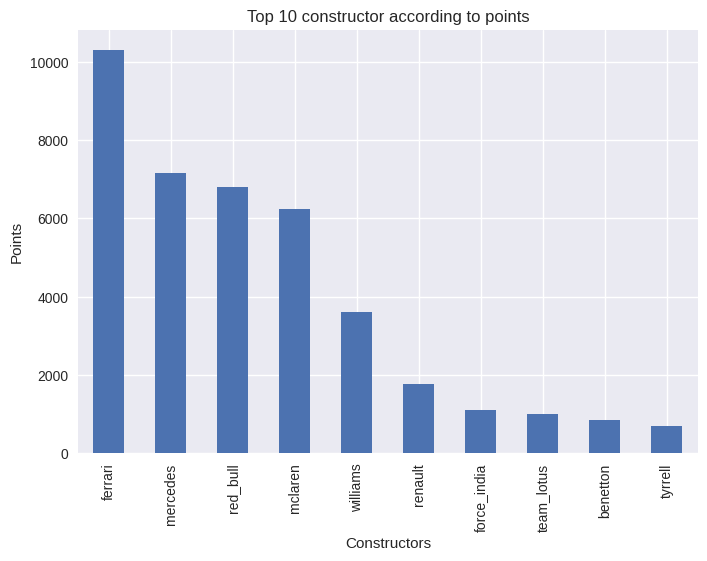

In [17]:
# prompt: find the top 10 constructorRef by total of points
constructor_perf.groupby('constructorRef')['points'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 constructor according to points')
plt.xlabel('Constructors')
plt.ylabel('Points')
print("Top ten constructors")
constructor_perf.groupby('constructorRef')['points'].sum().sort_values(ascending=False).head(10)


# Feature Engineering

In [30]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [18]:
#for columns with '\N' in results replace with median value

import numpy as np

results = results.replace('\\N', np.nan)
for col in results.select_dtypes(include='object'):
  results[col] = results[col].fillna(results[col].mode()[0])
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [19]:
# turn milliseconds column from object to int64

results['milliseconds'] = results['milliseconds'].astype('int64')

In [33]:

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  int64  
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [34]:
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


In [20]:
#find the unique number of raceId in pit_stops

unique_races = pit_stops['raceId'].unique()
print(f"Number of unique race IDs: {len(unique_races)}")

Number of unique race IDs: 251


In [21]:

# find the median time in milliseconds grouped by raceId and driverId in pit_stops and turn it into a dataframe
#The median number of time in milliseconds spent in pit stop

pit_stops_grouped = pit_stops.groupby(['raceId', 'driverId'])['milliseconds'].median().reset_index()
pit_stops_grouped.rename(columns={'milliseconds':'median_pit_stop_ms'}, inplace=True)
pit_stops_grouped.head(10)

,raceId,driverId,median_pit_stop_ms
0,841,1,23213.0
1,841,2,24046.0
2,841,3,23716.0
3,841,4,24181.0
4,841,5,24865.0
5,841,10,23792.0
6,841,13,24095.0
7,841,15,24873.5
8,841,16,24924.5
9,841,17,23426.0


from matplotlib import pyplot as plt
_df_0['driverId'].plot(kind='hist', bins=20, title='driverId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['median_pit_stop_ms'].plot(kind='hist', bins=20, title='median_pit_stop_ms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='driverId', y='median_pit_stop_ms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['raceId']
  ys = series['median_pit_stop_ms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('raceId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('raceId')
_ = plt.ylabel('median_pit_stop_ms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['raceId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'raceId'}, axis=1)
              .sort_values('raceId', ascending=True))
  xs = counted['raceId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('raceId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('raceId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['driverId']
  ys = series['median_pit_stop_ms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('driverId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('driverId')
_ = plt.ylabel('median_pit_stop_ms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['driverId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'driverId'}, axis=1)
              .sort_values('driverId', ascending=True))
  xs = counted['driverId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('driverId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('driverId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['driverId'].plot(kind='line', figsize=(8, 4), title='driverId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['median_pit_stop_ms'].plot(kind='line', figsize=(8, 4), title='median_pit_stop_ms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [49]:
unique_races = pit_stops_grouped['raceId'].unique()
print(f"Number of unique race IDs: {len(unique_races)}")

Number of unique race IDs: 251


I chose the median pit stop time instead of total time to account for outliers that could possibly skew the time

In [23]:
#combine dataframes results, pit_stops_grouped, drivers, and constructors.

merged_data = results.merge(pit_stops_grouped, on=['raceId', 'driverId'], how='left')
merged_data = merged_data.merge(drivers, on='driverId', how='left')
merged_data = merged_data.merge(constructors, on='constructorId', how='left')

merged_data.head().T

,0,1,2,3,4
resultId,1,2,3,4,5
raceId,18,18,18,18,18
driverId,1,2,3,4,5
constructorId,1,2,3,4,1
number_x,22,3,7,5,23
grid,1,5,7,11,3
position,1,2,3,4,5
positionText,1,2,3,4,5
positionOrder,1,2,3,4,5
points,10.0,8.0,6.0,5.0,4.0


In [24]:
#rename column name millisecond
merged_data.rename(columns={"milliseconds": "total_race_time_ms"}, inplace=True)
merged_data.rename(columns={"constructorRef": "team_name"}, inplace=True)
merged_data.rename(columns={"driverRef": "driver_name"}, inplace=True)
merged_data.rename(columns={"laps": "total_laps"}, inplace=True)


In [50]:
num_rows = len(merged_data)
print(f"Number of rows: {num_rows}")

Number of rows: 26080


There are unneccesary columns in the merged data set drop columns

In [26]:

#From merged_data dataframe drop the following columns: 'number_x', 'position', 'positionText', 'time', 'statusId', 'number_y', 'code', 'forename', 'surname', 'dob', 'nationality_x', 'url_x', 'name', nationality_y', 'url_y'

merged_data.drop(columns=['number_x', 'position', 'positionText', 'time', 'statusId', 'number_y', 'code', 'forename', 'surname', 'dob', 'nationality_x', 'url_x', 'name', 'nationality_y', 'url_y'], inplace=True)

In [27]:

merged_data.head().T

,0,1,2,3,4
resultId,1,2,3,4,5
raceId,18,18,18,18,18
driverId,1,2,3,4,5
constructorId,1,2,3,4,1
grid,1,5,7,11,3
positionOrder,1,2,3,4,5
points,10.0,8.0,6.0,5.0,4.0
total_laps,58,58,58,58,58
total_race_time_ms,5690616,5696094,5698779,5707797,5708630
fastestLap,39,41,41,58,43


Check for null values in merged_data

In [28]:
unique_raceId = merged_data['raceId'].unique()
print(f"Number of unique race IDs in merged_data: {len(unique_raceId)}")

Number of unique race IDs in merged_data: 1091


In [29]:

merged_data.isnull().sum()

resultId                  0
raceId                    0
driverId                  0
constructorId             0
grid                      0
positionOrder             0
points                    0
total_laps                0
total_race_time_ms        0
fastestLap                0
rank                      0
fastestLapTime            0
fastestLapSpeed           0
median_pit_stop_ms    21149
driver_name               0
team_name                 0
dtype: int64

In [30]:
#replace the null values in median_pit_stops_ms with the median

median_pit_stop_time = merged_data['median_pit_stop_ms'].median()
merged_data['median_pit_stop_ms'].fillna(value=median_pit_stop_time, inplace=True)



In [31]:
merged_data.isnull().sum()

resultId              0
raceId                0
driverId              0
constructorId         0
grid                  0
positionOrder         0
points                0
total_laps            0
total_race_time_ms    0
fastestLap            0
rank                  0
fastestLapTime        0
fastestLapSpeed       0
median_pit_stop_ms    0
driver_name           0
team_name             0
dtype: int64

In [32]:

#check for duplicate values in merged_data

duplicate_rows = merged_data[merged_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [33]:
merged_data

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,total_laps,total_race_time_ms,fastestLap,rank,fastestLapTime,fastestLapSpeed,median_pit_stop_ms,driver_name,team_name
0,1,18,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,23681.0,hamilton,mclaren
1,2,18,2,2,5,2,8.0,58,5696094,41,3,1:27.739,217.586,23681.0,heidfeld,bmw_sauber
2,3,18,3,3,7,3,6.0,58,5698779,41,5,1:28.090,216.719,23681.0,rosberg,williams
3,4,18,4,4,11,4,5.0,58,5707797,58,7,1:28.603,215.464,23681.0,alonso,renault
4,5,18,5,1,3,5,4.0,58,5708630,43,1,1:27.418,218.385,23681.0,kovalainen,mclaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,16,0.0,44,5053521,25,15,1:50.994,227.169,23066.5,ricciardo,alphatauri
26076,26082,1110,858,3,18,17,0.0,44,5054926,37,9,1:50.486,228.213,23570.0,sargeant,williams
26077,26083,1110,807,210,0,18,0.0,44,5060900,26,4,1:49.907,229.415,24904.5,hulkenberg,haas
26078,26084,1110,832,6,4,19,0.0,23,14259460,9,19,1:53.138,222.864,23303.0,sainz,ferrari


Check for outliers

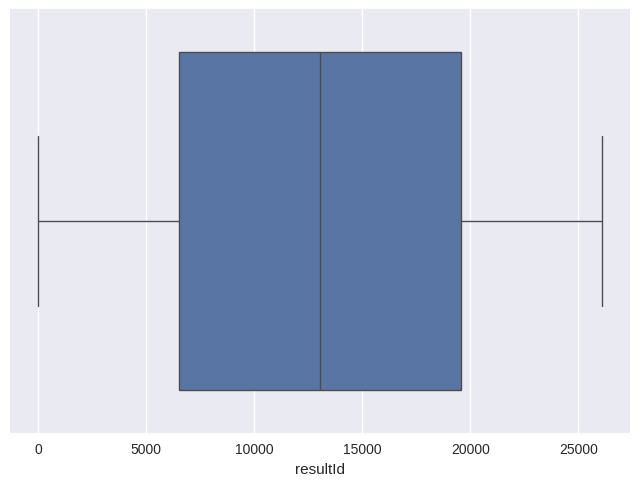

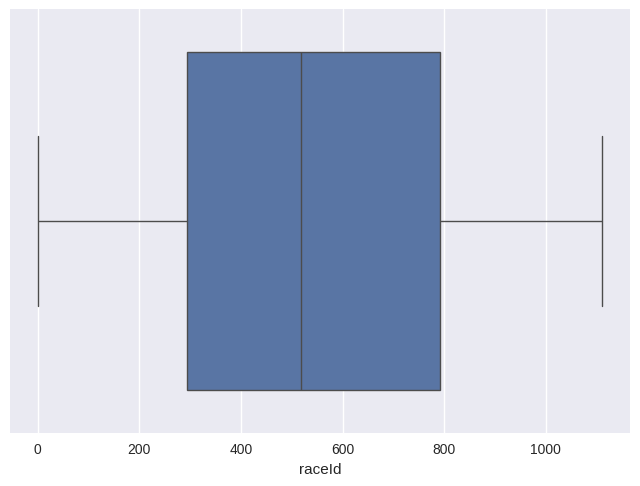

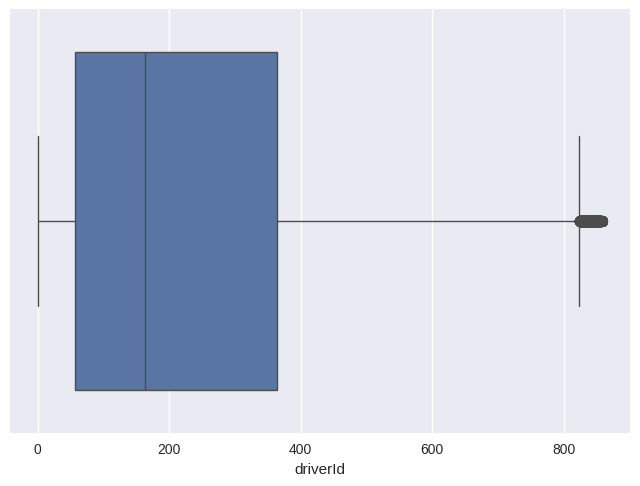

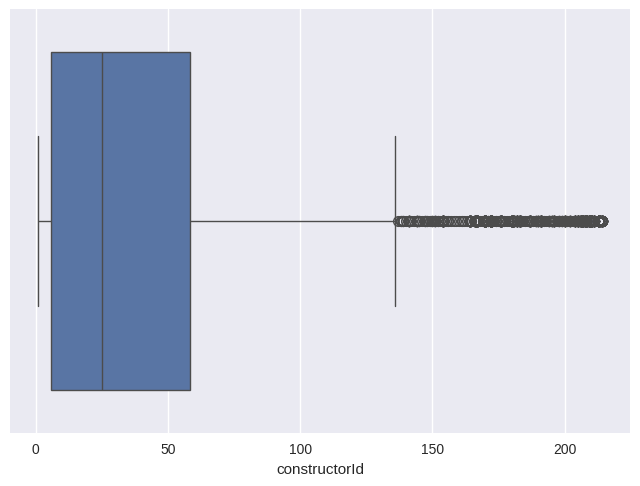

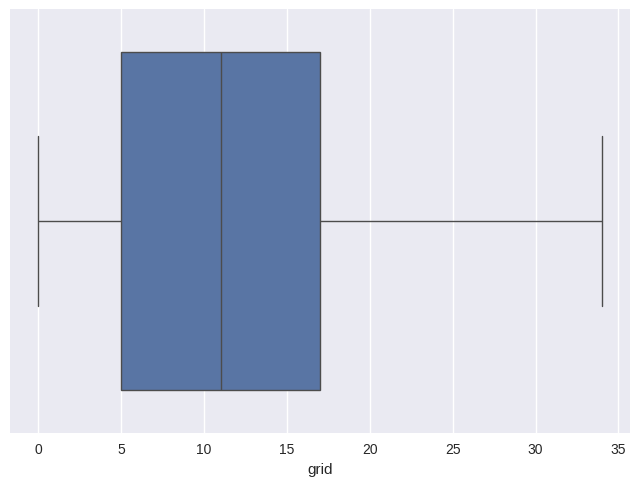

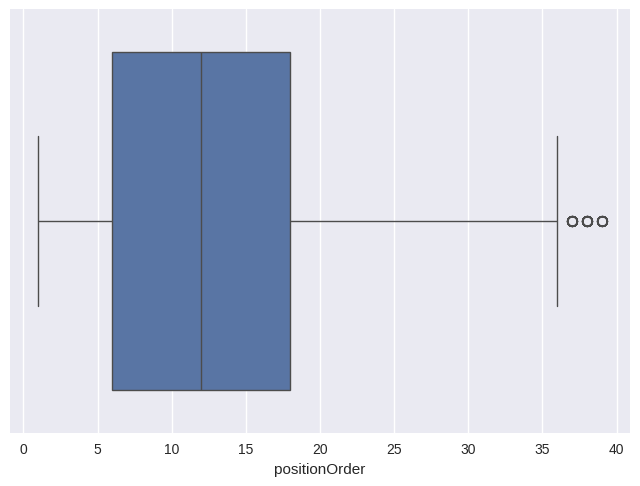

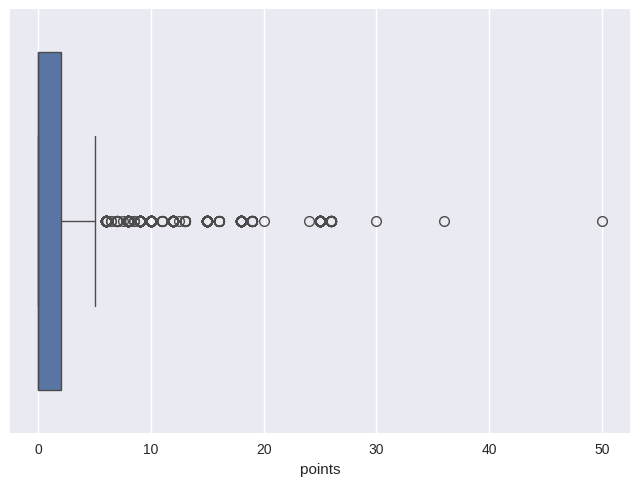

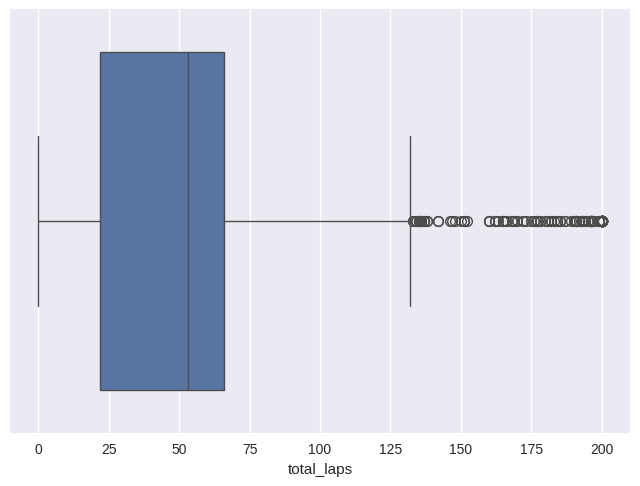

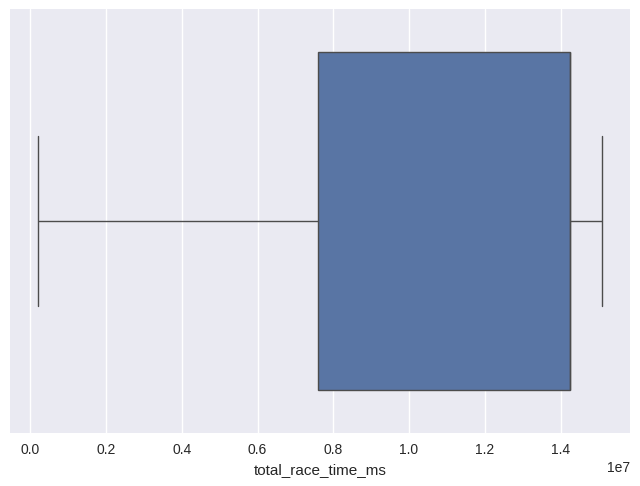

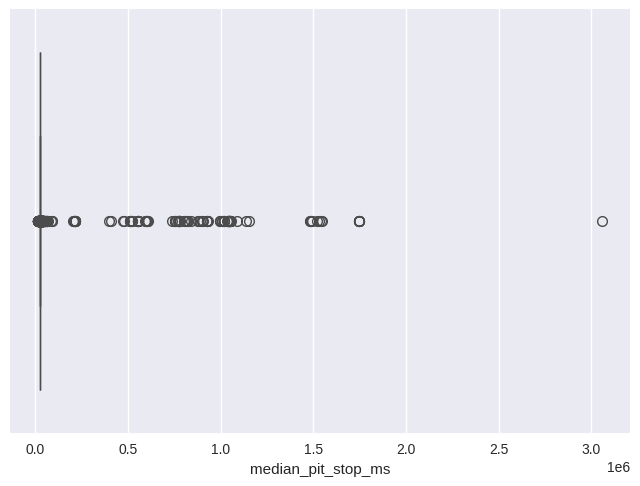

In [34]:
# Create a boxplot for each numerical column in the merged_data dataframe
for col in merged_data.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=merged_data[col])
    plt.show()

Create a heatmap to see how the data correlates

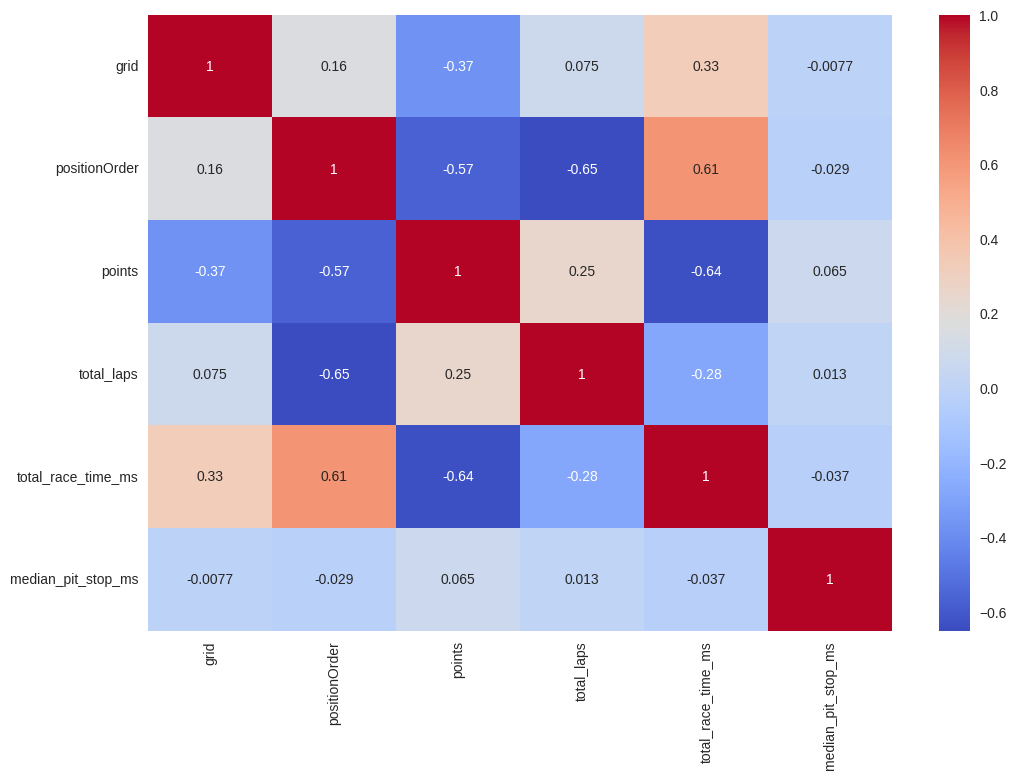

In [35]:
#create a heatmap of merged_data

import matplotlib.pyplot as plt
import seaborn as sns

# Select int64 and float64 columns, excluding specific columns
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns
excluded_columns = ['resultId', 'raceId', 'driverId', 'constructorId']
filtered_columns = [col for col in numeric_columns if col not in excluded_columns]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data[filtered_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

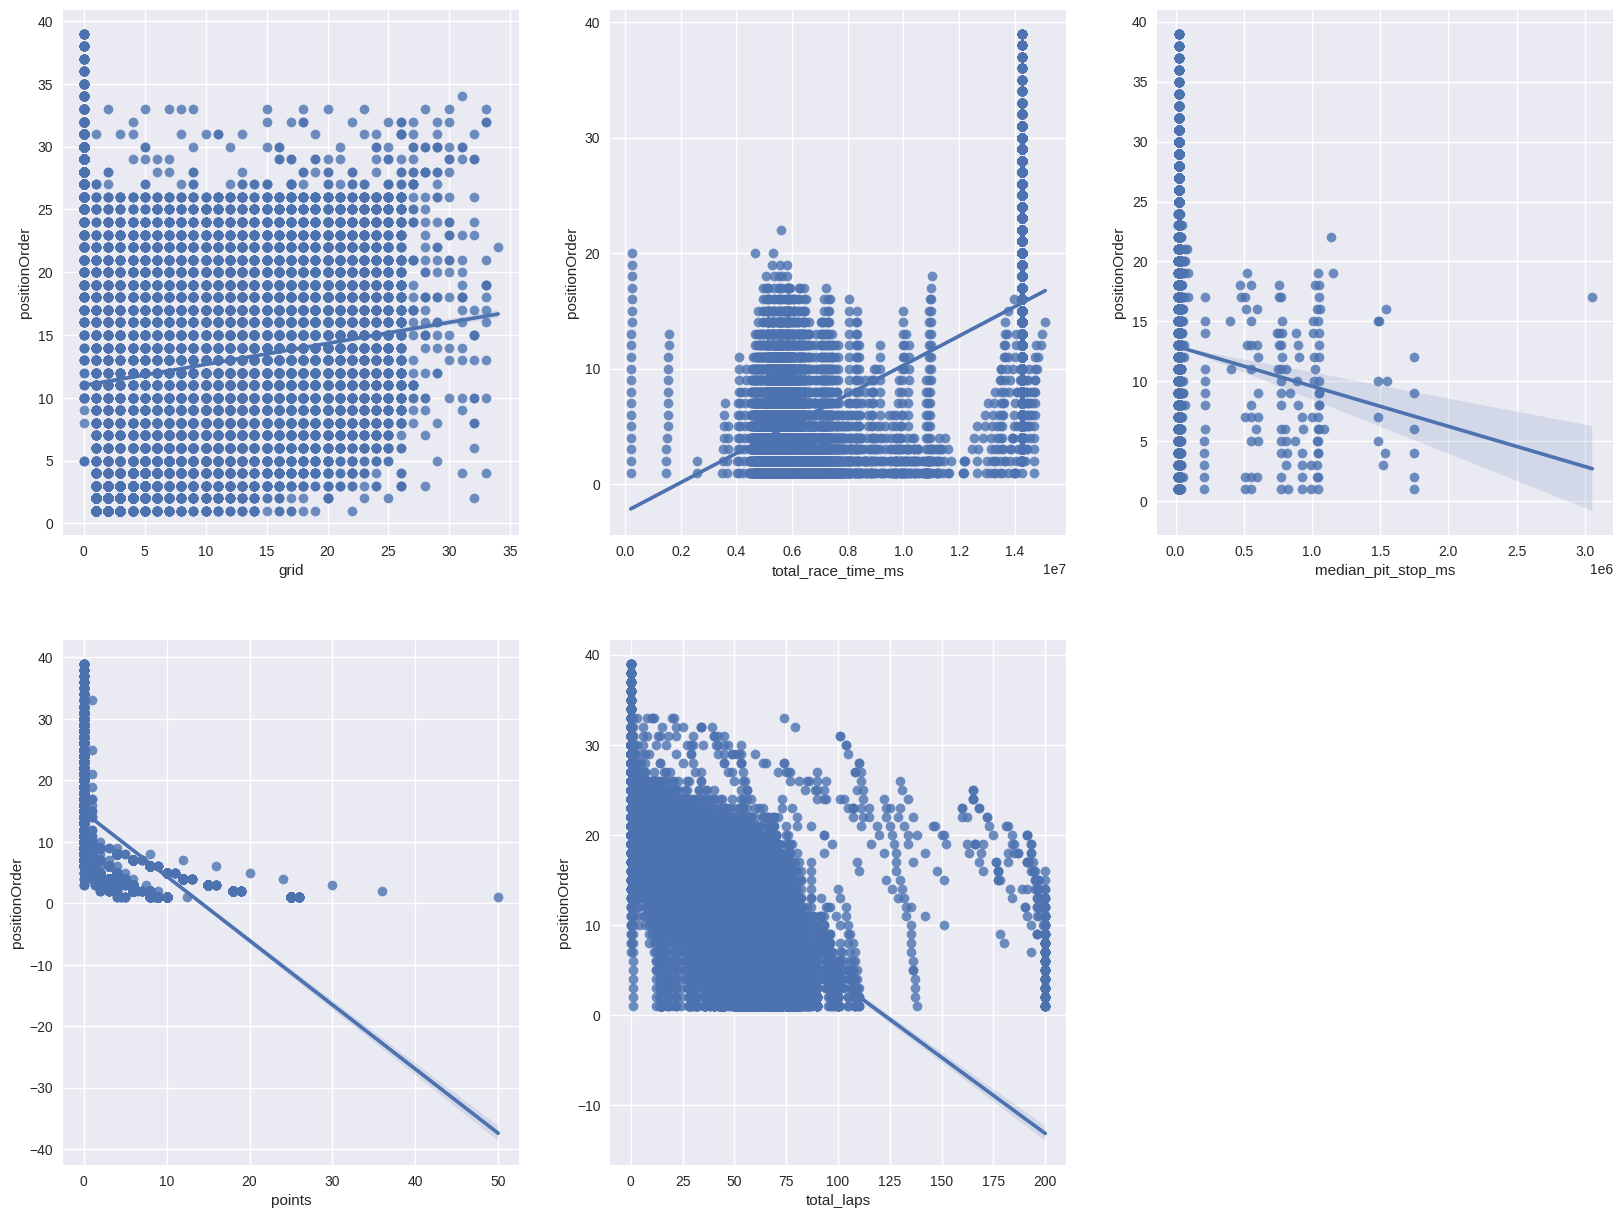

In [36]:
columns=['grid','total_race_time_ms','median_pit_stop_ms','points','total_laps']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'positionOrder', data = merged_data,order=1)
plt.show()

# **Linear Regression**

In [37]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:

merged_data_copy = merged_data.copy()
merged_data_copy.head(20)

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,total_laps,total_race_time_ms,fastestLap,rank,fastestLapTime,fastestLapSpeed,median_pit_stop_ms,driver_name,team_name
0,1,18,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,23681.0,hamilton,mclaren
1,2,18,2,2,5,2,8.0,58,5696094,41,3,1:27.739,217.586,23681.0,heidfeld,bmw_sauber
2,3,18,3,3,7,3,6.0,58,5698779,41,5,1:28.090,216.719,23681.0,rosberg,williams
3,4,18,4,4,11,4,5.0,58,5707797,58,7,1:28.603,215.464,23681.0,alonso,renault
4,5,18,5,1,3,5,4.0,58,5708630,43,1,1:27.418,218.385,23681.0,kovalainen,mclaren
5,6,18,6,3,13,6,3.0,57,14259460,50,14,1:29.639,212.974,23681.0,nakajima,williams
6,7,18,7,5,17,7,2.0,55,14259460,22,12,1:29.534,213.224,23681.0,bourdais,toro_rosso
7,8,18,8,6,15,8,1.0,53,14259460,20,4,1:27.903,217.180,23681.0,raikkonen,ferrari
8,9,18,9,2,2,9,0.0,47,14259460,15,9,1:28.753,215.100,23681.0,kubica,bmw_sauber
9,10,18,10,7,18,10,0.0,43,14259460,23,13,1:29.558,213.166,23681.0,glock,toyota


In [51]:

merged_data_copy.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,total_laps,total_race_time_ms,median_pit_stop_ms
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,2.608000e+04,2.608000e+04
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,1.202443e+07,2.817332e+04
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,3.708024e+06,6.723525e+04
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.070710e+05,1.654900e+04
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,7.602726e+06,2.368100e+04
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,1.425946e+07,2.368100e+04
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,1.425946e+07,2.368100e+04
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,1.509054e+07,3.055732e+06


Choose columns that will be used as features: grid, total_race_time_ms, median_pit_stop_ms. Target variable: positionOrder

In [40]:
#Features
features =  ['grid','total_race_time_ms','median_pit_stop_ms','total_laps']
X = merged_data_copy[features]
# Target variable
y = merged_data_copy['positionOrder']


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [57]:
# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [15.7941629  10.65812097  4.22766133 ... -6.28605221 21.48875676
 14.40428663]


In [58]:
# Concatenate or join the predicted values with the actual values
predictions_df = pd.DataFrame({'Actual_Position': y_test, 'Predicted_Positition': y_pred})

# Print the DataFrame containing actual and predicted values
print(predictions_df)

       Actual_Position  Predicted_Positition
1441                 8             15.794163
2464                 9             10.658121
3023                 6              4.227661
22617                6              4.553457
24463                4              4.637901
...                ...                   ...
4010                 7             13.845735
13373                5              4.126206
20261                5             -6.286052
19793               27             21.488757
15435               20             14.404287

[5216 rows x 2 columns]


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(mse, 2)))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("The Root Mean Squared Error of our Model is {}".format(round(rmse, 2)))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))


Mean Absolute Error: 3.533515775759433
The Mean Absolute Error of our Model is 22.27
The Root Mean Squared Error of our Model is 4.72
The accuracy of our model is 63.0%


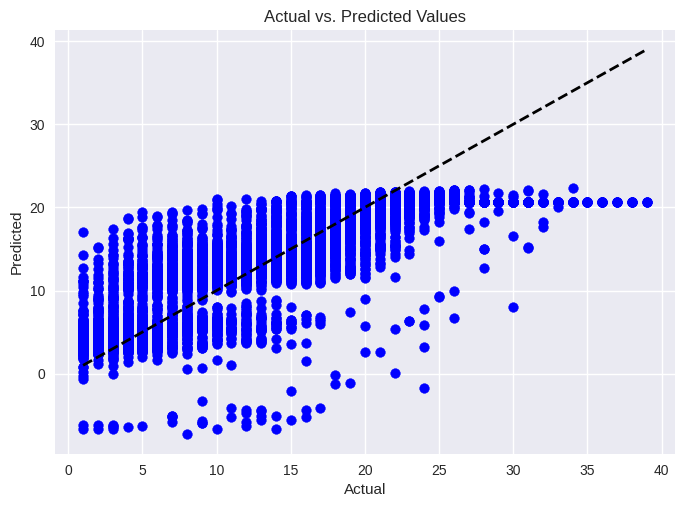

In [60]:
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

The low accuracy of the model could be due to the outliers presented in the dataset. Narrowing down the historical data to a set amount of years instead of entire dataset. Choosing different features could also improve accuracy.

# Random Forest

In [61]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
#Features
X = merged_data_copy[['grid','total_race_time_ms','median_pit_stop_ms','total_laps']]
# Target variable
y = merged_data_copy['positionOrder']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
# You can adjust hyperparameters such as n_estimators, max_depth, etc.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))


Mean Squared Error: 13.946694684750865
The accuracy of our model is 77.0%


In [62]:
# Concatenate or join the predicted values with the actual values
random_predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame containing actual and predicted values
print(random_predictions_df)

       Actual  Predicted
1441        8  12.983235
2464        9   8.661111
3023        6   2.800000
22617       6   6.920000
24463       4   5.560000
...       ...        ...
4010        7  14.006636
13373       5   4.580000
20261       5   4.160000
19793      27  21.172127
15435      20  13.602541

[5216 rows x 2 columns]


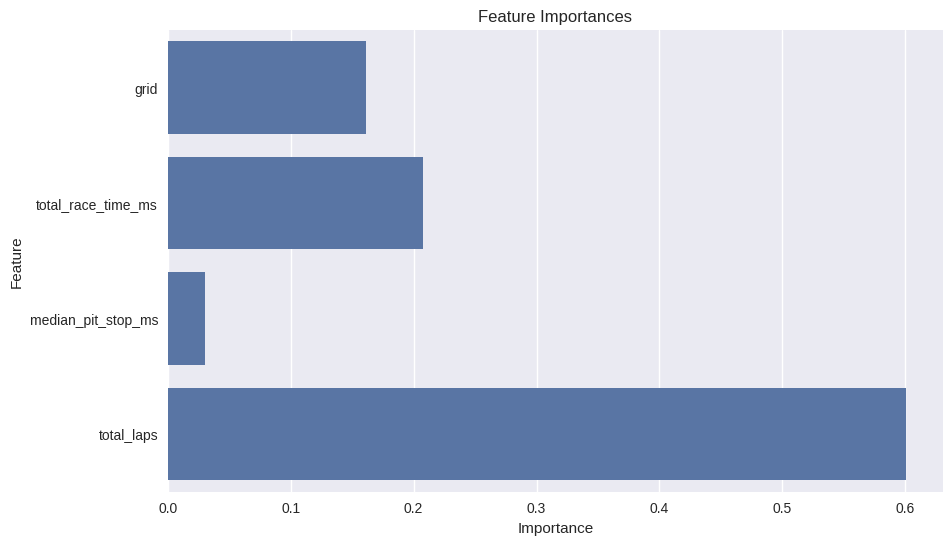

In [63]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


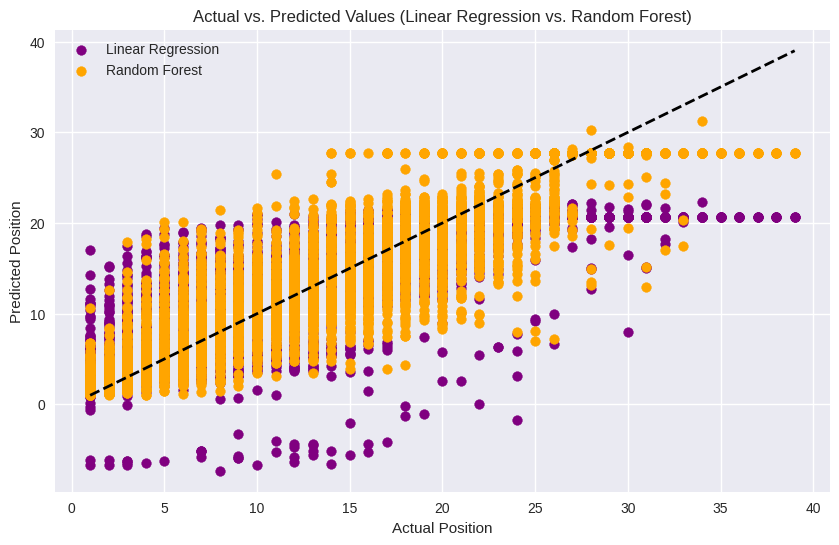

In [64]:
# Create scatterplot with actual vs. predicted values for both models
plt.figure(figsize=(10, 6))

# Plot Linear Regression results
plt.scatter(predictions_df['Actual_Position'], predictions_df['Predicted_Positition'], color='purple', label='Linear Regression')

# Plot Random Forest results
plt.scatter(random_predictions_df['Actual'], random_predictions_df['Predicted'], color='orange', label='Random Forest')

# Add diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Position')
plt.ylabel('Predicted Position')
plt.title('Actual vs. Predicted Values (Linear Regression vs. Random Forest)')

# Add legend
plt.legend()

# Show the plot
plt.show()